In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/prasun/GitDemo/Learning_Deep_Learning/Lesson9/Customer_Churn_Dataset.xls")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Customer ID is irrelevant, Let's drop it
data.drop(labels=["customerID"],axis="columns",inplace= True)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#Target Labels
data.Churn.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [5]:
#Total Charges- object??
data.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [6]:
data.TotalCharges.values #ndarray

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
#Changing the datatype
#data.astype({"TotalCharges":"float64"}).dtypes ## Error is due to missing values
pd.to_numeric(data.TotalCharges, errors='coerce') #Missing Values are treated as NA

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#Integer Location
data.iloc[[488,753,936,1082,1340]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [10]:
# How Many Rows to be dropped
pd.to_numeric(data.TotalCharges, errors='coerce').isnull().shape, data.shape

((7043,), (7043, 20))

In [11]:
#dropping Null Values
data1 = data[data.TotalCharges != " "]
data1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [12]:
#Repeating the Type Casting again to chechk if it gives any error message
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

/tmp/ipykernel_5539/2647228278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges = pd.to_numeric(data1.TotalCharges)


In [13]:
# Type Casting Successful
data1.TotalCharges.dtypes

dtype('float64')

In [14]:
data1.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: >

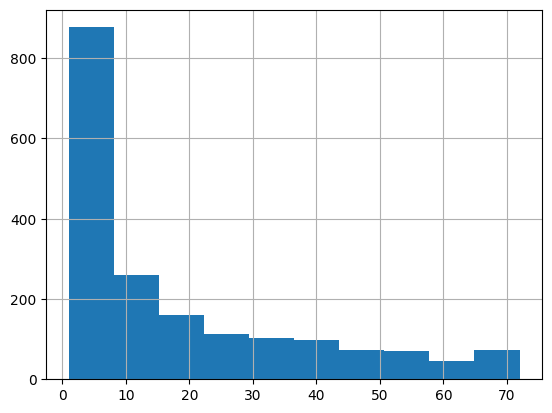

In [15]:
# Customer Retention accross Loyality
data1[data1.Churn != "No"].tenure.hist()

<Axes: >

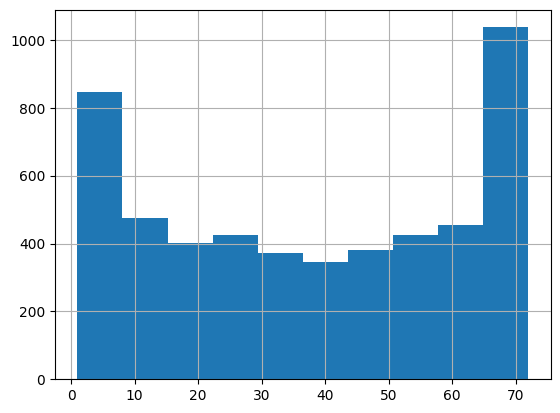

In [16]:
# Customer Churn accross Loyality
data1[data1.Churn == "No"].tenure.hist()

In [17]:
# Fetching Traing Set to Carryout Exploration
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data1.drop(["Churn"],axis="columns"),data1.Churn)

In [18]:
df = pd.concat([X_train,y_train],axis=1)
df_train = pd.DataFrame(df,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'])

In [19]:
df_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2306,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.85,199.85,No
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2540,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.95,7795.95,No


In [20]:
# Figuring Out Customer Churn over `tenure`
df_train[df_train.Churn == "No"].shape,df_train[df_train.Churn == "Yes"].shape,

((3910, 20), (1364, 20))

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

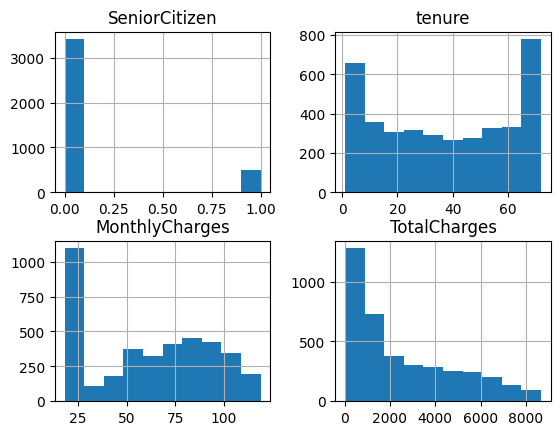

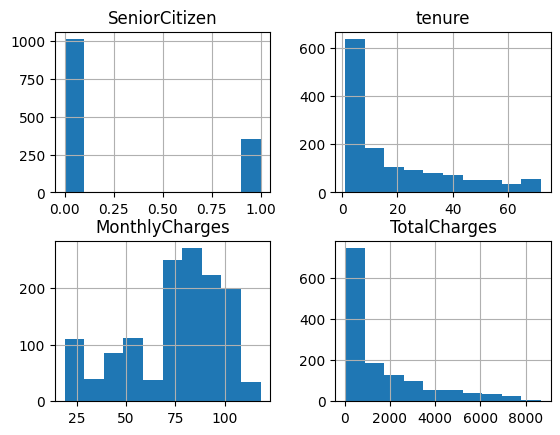

In [21]:
#Histograms along various numeric fields 
df_train[df_train.Churn == "No"].hist()
df_train[df_train.Churn == "Yes"].hist()

#### Insight:
- Seemingly `tenure` and `MonthlyCharges` are two of the most impactful features

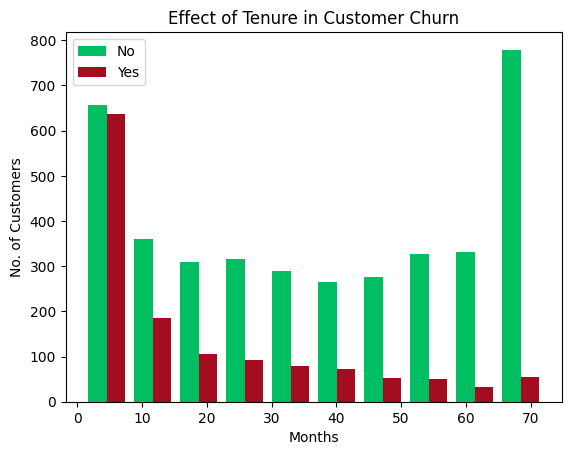

In [22]:
# Let's Visualize Tenure of both Churned/Retained Customers Side-by-side
x0 = df_train.tenure[df_train.Churn == "No"]
x1 = df_train.tenure[df_train.Churn == "Yes"]

plt.Figure(figsize=(5,3))
plt.xlabel("Months")
plt.ylabel("No. of Customers")
plt.title("Effect of Tenure in Customer Churn")
plt.hist([x0,x1],color=(["#00bf63","#a20e20"]), label=["No","Yes"])
plt.legend()

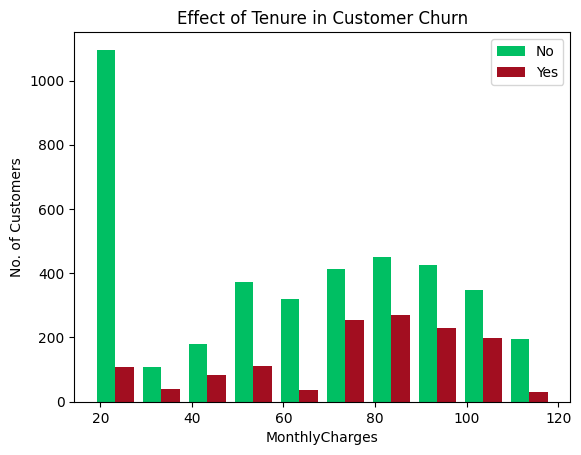

In [23]:
#Let's Do it the same for MonthlyCharges
x0 = df_train.MonthlyCharges[df_train.Churn == "No"]
x1 = df_train.MonthlyCharges[df_train.Churn == "Yes"]

plt.Figure(figsize=(5,3))
plt.xlabel("MonthlyCharges")
plt.ylabel("No. of Customers")
plt.title("Effect of Tenure in Customer Churn")
plt.hist([x0,x1],color=(["#00bf63","#a20e20"]), label=["No","Yes"])
plt.legend()

In [24]:
#let's have unique values from each column as Function
def unq_val(df_train):
    for column in df_train:
        if df_train[column].dtypes == "object":
            print(f"{column}: {df_train[column].unique()}")

In [25]:
#Let's exaine the unique values
unq_val(data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
# Let's replace redundant fields
data1.replace('No phone service',"No",inplace= True)
data1.replace('No internet service','No',inplace= True)
unq_val(data1) 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/tmp/ipykernel_5539/1640973077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No phone service',"No",inplace= True)
/tmp/ipykernel_5539/1640973077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No internet service','No',inplace= True)


In [27]:
#Find out columns having Only two categories
col2 = []

for col in data1.columns:
    if len(data1[col].unique()) == 2 and "Yes" in df_train[col].unique():
        col2.append(col)
col2

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [28]:
for col in col2:
    data1[col].replace({"Yes":1,"No":0},inplace = True)

/tmp/ipykernel_5539/1757319259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].replace({"Yes":1,"No":0},inplace = True)
/tmp/ipykernel_5539/1757319259.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1[col].replace({"Yes":1,"No":0},inplace = True)
/tmp/ipykernel_5539/1757319259

In [29]:
unq_val(data1) 

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
for col in col2:
    print(f"{col}: {data1[col].unique()}")

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


In [31]:
# Labeling gender column
data1["gender"].replace({"Male":0,"Female":1},inplace = True)
data1["gender"].unique()

/tmp/ipykernel_5539/1769735225.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1["gender"].replace({"Male":0,"Female":1},inplace = True)
/tmp/ipykernel_5539/1769735225.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1["gender"].replace({"Male":0,"Female":1},inplace = True)
/tmp/ipyke

array([1, 0])

In [32]:
# Creating Dummy Variables
df1 = pd.get_dummies(data= data1,columns=["InternetService","Contract","PaymentMethod"],drop_first=True, dtype=float)
df2 = pd.get_dummies(data= data1,columns=["InternetService","Contract","PaymentMethod"], dtype=float)
df1.shape, df2.shape

((7032, 24), (7032, 27))

In [33]:
#Checking existing data-types
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No             

In [34]:
# identify Features to apply scaling on
mx = []
for col in df2.columns:
    r = df2[col].max() - df2[col].min()
    if r >= 3:
        mx.append(col)
print(mx)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [35]:
# Instatiating MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
# Fit-Transform
df2[mx] = scaler.fit_transform(df2[mx])

In [37]:
# Fetching Traing Set to Carryout Exploration
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2.drop(["Churn"],axis="columns"),df2.Churn)

In [38]:
# Number of Features
X_train.shape[1]

26

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

2024-09-30 13:19:44.904521: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 13:19:45.073443: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 13:19:45.277698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 13:19:45.443820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 13:19:45.444882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 13:19:45.751630: I tensorflow/core/platform/cpu_feature_guard.cc:

In [40]:
layer1 = Dense(units=20,input_shape=(26,),activation="relu")
layer2 = Dense(units=15,activation="relu")
layer3 = Dense(units=15,activation="relu")
layer4 = Dense(units=1,activation="sigmoid")

model = Sequential([layer1, layer2, layer3, layer4])

model.compile(
    optimizer= Adam(),
    loss= BinaryCrossentropy(),
    metrics= ["accuracy"]
)

/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.fit(X_train,y_train,epochs= 100)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7287 - loss: 0.5413
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7878 - loss: 0.4398
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4288
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 0.4377
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.4228
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.4277
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4210
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7936 - loss: 0.4201
Epoch 9/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.4255
Epoch 10/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8096 - loss: 0.4100
Epoch 11/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8036 - loss: 0.4163
Epoch 12/100
165/165 ━━━━━━━━━━━━━━━━━━━━

In [42]:
#model Evaluate
model.evaluate(X_test,y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7830 - loss: 0.5083


[0.4842163920402527, 0.7849829196929932]

In [43]:
type(y_test.values)

numpy.ndarray

In [44]:
y_test.values[[10,12,121,15]]

array([1, 0, 0, 1])

In [45]:
y_test.values[[1,15,21,4]]

array([1, 1, 0, 1])

In [46]:
yp = model.predict(X_test)
ypf = []
for i in yp:
    if i >= 0.5:
        ypf.append(1)
    else:
        ypf.append(0) 
ypf

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [47]:
#Classification Report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,ypf))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1321
           1       0.58      0.49      0.53       437

    accuracy                           0.78      1758
   macro avg       0.71      0.69      0.70      1758
weighted avg       0.78      0.78      0.78      1758



In [48]:
# The Extend of Asymmetricity
data.Churn.value_counts(normalize= True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

- Note for for Asymmetric Data `accuracy` is meaningless.
- `F1 Score` Matters the most fo each class.


In [51]:
# Defining ANN function
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

def ANN(X_train,y_train, X_test, y_test, loss, weights):
    layer1 = Dense(units= 26, input_dim = 26, activation= "relu")
    layer2 = Dense(units= 15, activation= "relu")
    layer3 = Dense(units= 1, activation= "sigmoid")
    model = Sequential([layer1,layer2,layer3])
    model.compile(
        optimizer = Adam(),
        loss = loss,
        metrics = ["accuracy"]
        )
    
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight= weights)
    
    print(model.summary())
    print(model.evaluate(X_test,y_test))

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)

    print(f"Classification Report\n {classification_report(y_test,y_pred)}")

    return y_pred



In [106]:
y_pred = ANN(X_train,y_train,X_test,y_test,loss= BinaryCrossentropy(),weights= -1)

Epoch 1/100


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5539 - loss: 0.6917
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7904 - loss: 0.4420
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4346
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4390
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4206
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4232
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4175
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7951 - loss: 0.4289
Epoch 9/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8012 - loss: 0.4224
Epoch 10/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8158 - loss: 0.4001
Epoch 11/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4190
Epoch 12/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371 (13.17 KB)

 Trainable params: 1,123 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,248 (8.79 KB)

None
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7840 - loss: 0.4487
[0.4383704960346222, 0.7855517864227295]
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1321
           1       0.58      0.49      0.53       437

    accuracy                           0.79      1758
   macro avg       0.71      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [53]:
weight_0,weight_1 = data.Churn.value_counts(normalize= True)

In [54]:
y_train.value_counts()

Churn
0    3842
1    1432
Name: count, dtype: int64

### Method1: Undersampling Majority Class

In [108]:
#Subgrouping Based on Target Class
df_class0 = df2[df2["Churn"] == 0]
df_class1 = df2[df2["Churn"] == 1]

In [109]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [124]:
#Oversampling Minority Class
df_class10 = df_class0.sample(df_class0.shape[0],replace= True)
df_under = pd.concat([df_class01,df_class0], axis= 0)

In [120]:
from sklearn.model_selection import train_test_split
Xu_train,Xu_test,yu_train,yu_test  = train_test_split(df_under.drop(["Churn"],axis="columns"), df_under[["Churn"]], test_size =0.20, stratify=df_under[["Churn"]])

In [121]:
Xu_train.shape,yu_train.shape,Xu_test.shape,yu_test.shape

((2990, 26), (2990, 1), (748, 26), (748, 1))

In [122]:
Xu_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5607,1,1,0,0,0.549296,0,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3019,1,0,1,1,0.295775,1,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5348,0,0,0,1,0.338028,0,0,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3656,0,1,1,0,0.676056,1,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
766,0,0,0,0,0.295775,1,1,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [123]:
yu_pred = ANN(Xu_train,yu_train,Xu_test,yu_test,loss= BinaryCrossentropy(),weights= -1)

Epoch 1/100


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6666 - loss: 0.6300
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7357 - loss: 0.5364
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7536 - loss: 0.5049
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.5012
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7592 - loss: 0.4975
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7629 - loss: 0.4934
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.4818
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7685 - loss: 0.4810
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.4893
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7589 - loss: 0.4925
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7752 - loss: 0.4688
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7574 - lo

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371 (13.17 KB)

 Trainable params: 1,123 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,248 (8.79 KB)

None
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7663 - loss: 0.5228  
[0.5556659698486328, 0.7540106773376465]
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       374
           1       0.73      0.81      0.77       374

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748



### Method2: Oversampling Minority Class

In [125]:
#Undersampling the data
df_class01 = df_class0.sample(df_class1.shape[0])
df_under = pd.concat([df_class01,df_class1], axis= 0)

from sklearn.model_selection import train_test_split
Xo_train,Xo_test,yo_train,yo_test  = train_test_split(df_under.drop(["Churn"],axis="columns"), df_under[["Churn"]], test_size =0.20, stratify=df_under[["Churn"]])

In [126]:
yo_pred = ANN(Xo_train,yo_train,Xo_test,yo_test,loss= BinaryCrossentropy(),weights= -1)

Epoch 1/100


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5892 - loss: 0.6559
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 0.5390
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.5071
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7597 - loss: 0.5038
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.4825
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7554 - loss: 0.5053
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.4916
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.4837
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4788
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.4816
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7776 - loss: 0.4698
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - lo

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371 (13.17 KB)

 Trainable params: 1,123 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,248 (8.79 KB)

None
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7294 - loss: 0.5354  
[0.5141957998275757, 0.7486631274223328]
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       374
           1       0.73      0.78      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



### Method 3: SMOTE

In [127]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 8.7 kB/s eta 0:00:00a 0:00:03m
Note: you may need to restart the kernel to use updated packages.


In [131]:
X = df2.drop(["Churn"],axis="columns")
y = df2.Churn
X.shape,y.shape

((7032, 26), (7032,))

In [135]:
#Resampling Using Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = "minority")
X_re,y_re = sm.fit_resample(X,y)
print(y_re.shape, "\n\n", y_re.value_counts())

(10326,) 

 Churn
0    5163
1    5163
Name: count, dtype: int64


In [137]:
#Train_Test Split
Xsm_train,Xsm_test,ysm_train,ysm_test  = train_test_split(X_re,y_re, test_size =0.20, stratify=y_re)

In [138]:
#Model Fitting
ysm_pred = ANN(Xsm_train,ysm_train,Xsm_test,ysm_test,loss= BinaryCrossentropy(),weights= -1)

Epoch 1/100


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7076 - loss: 0.5869
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7725 - loss: 0.4818
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7669 - loss: 0.4905
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7805 - loss: 0.4648
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7779 - loss: 0.4689
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7791 - loss: 0.4674
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7810 - loss: 0.4632
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7867 - loss: 0.4576
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4555
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4533
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4475
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371 (13.17 KB)

 Trainable params: 1,123 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,248 (8.79 KB)

None
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.4104
[0.4234311282634735, 0.811229407787323]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      1033
           1       0.78      0.87      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066



### Method4 : Ensemble

In [143]:
# Segregating Classes
cl_0 = df2[df2.Churn == 0]
cl_1 = df2[df2.Churn == 1]

In [144]:
cl_0.shape,cl_1.shape

((5163, 27), (1869, 27))

In [149]:
# Making three ensemble classes
dfe_01 = pd.concat([cl_0[:1869],cl_1],axis= 0)
dfe_02 = pd.concat([cl_0[1869:1869*2],cl_1],axis= 0)
dfe_03 = pd.concat([cl_0[1869*2:],cl_1],axis= 0)

In [152]:
#Traing each model
Xe_train,Xe_test,ye_train,ye_test = train_test_split(dfe_01.drop(["Churn"],axis= "columns"), dfe_01["Churn"])
y1_pred = ANN(Xsm_train,ysm_train,Xsm_test,ysm_test,loss= BinaryCrossentropy(),weights= -1)

Xe_train,Xe_test,ye_train,ye_test = train_test_split(dfe_02.drop(["Churn"],axis= "columns"), dfe_02["Churn"])
y2_pred = ANN(Xsm_train,ysm_train,Xsm_test,ysm_test,loss= BinaryCrossentropy(),weights= -1)

Xe_train,Xe_test,ye_train,ye_test = train_test_split(dfe_03.drop(["Churn"],axis= "columns"), dfe_03["Churn"])
y3_pred = ANN(Xsm_train,ysm_train,Xsm_test,ysm_test,loss= BinaryCrossentropy(),weights= -1)


Epoch 1/100


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6745 - loss: 0.6048
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.4838
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7704 - loss: 0.4845
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7779 - loss: 0.4681
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.4620
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7810 - loss: 0.4649
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.4534
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4463
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4656
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.4549
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.4563
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371 (13.17 KB)

 Trainable params: 1,123 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,248 (8.79 KB)

None
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8139 - loss: 0.4224 
[0.4266347587108612, 0.8059051036834717]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      1033
           1       0.78      0.85      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Epoch 1/100


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6841 - loss: 0.5876
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.4680
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7809 - loss: 0.4626
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7887 - loss: 0.4561
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7820 - loss: 0.4636
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7956 - loss: 0.4474
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.4460
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7870 - loss: 0.4509
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4424
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7887 - loss: 0.4463
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.4438
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371 (13.17 KB)

 Trainable params: 1,123 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,248 (8.79 KB)

None
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8184 - loss: 0.4087
[0.4206623136997223, 0.8092933297157288]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1033
           1       0.79      0.84      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Epoch 1/100


/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6951 - loss: 0.5787
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7704 - loss: 0.4811
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7750 - loss: 0.4734
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7880 - loss: 0.4557
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7890 - loss: 0.4560
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7869 - loss: 0.4581
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7877 - loss: 0.4524
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4562
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7838 - loss: 0.4610
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4488
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4446
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371 (13.17 KB)

 Trainable params: 1,123 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,248 (8.79 KB)

None
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8039 - loss: 0.4279
[0.4329909384250641, 0.7967086434364319]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.78      0.83      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [158]:
y_esm = y_pred.copy()
for i in range(len(y_esm)):
    sum = y1_pred[i][0]+y2_pred[i][0]+y3_pred[i][0]
    if sum == 0:
        y_esm[i] = 0
    else:
        y_esm[i] = 1
print(classification_report(y_test,y_esm))

              precision    recall  f1-score   support

           0       0.77      0.40      0.53      1321
           1       0.26      0.65      0.37       437

    accuracy                           0.46      1758
   macro avg       0.52      0.52      0.45      1758
weighted avg       0.65      0.46      0.49      1758

